In [1]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops.variables import get_or_create_global_step
import inception_preprocessing
from inception_resnet_v2 import inception_resnet_v2, inception_resnet_v2_arg_scope
import time
import os
import cv2 as cv
import sys
import random
import numpy as np
from load_data import get_split, load_batch
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
slim = tf.contrib.slim
log_dir = "./log"
dataset_dir = '.'
batch_size = 32
num_epochs = 1
num_samples = 3333
checkpoint_file = tf.train.latest_checkpoint(log_dir)

In [3]:
image_raw_data = tf.gfile.FastGFile("./images/0074464.jpg", 'r').read()
with tf.Graph().as_default() as graph:
    image_data = tf.image.decode_jpeg(image_raw_data)
    images = tf.expand_dims(image_data, axis=0)
    if images.dtype != tf.float32:
        images = tf.image.convert_image_dtype(images, dtype=tf.float32)
    images.set_shape([1,299,299,3])
    
    #image = tf.image.resize_images(image, 299, 299, 3)
    with slim.arg_scope(inception_resnet_v2_arg_scope()):
        logits, end_points = inception_resnet_v2(images, num_classes=100, is_training=False)
    
    
    variables_to_restore = slim.get_variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)
        
    def restore_fn(sess):
        return saver.restore(sess, checkpoint_file)
    
    sv = tf.train.Supervisor(logdir=None, summary_op = None, saver = None, init_fn = restore_fn)
    with sv.managed_session() as sess:
        show_image,end_data = sess.run([images, end_points['mask']])

ValueError: Index out of range using input dim 0; input has only 0 dims for 'InceptionResnetV2/Logits/mask/strided_slice' (op: 'StridedSlice') with input shapes: [], [1], [1], [1] and with computed input tensors: input[3] = <1>.

   权值激活很小？？

In [23]:
print show_image.shape, end_data.shape

(1, 299, 299, 3) (16, 8, 8, 1536)


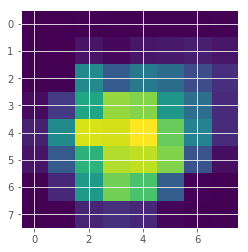

In [24]:
end_data = np.mean(end_data,3)
plt.imshow(end_data[0,:,:])

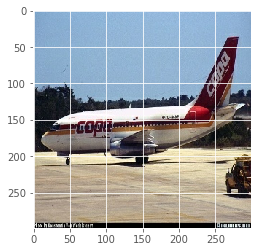

In [25]:
real_img = show_image[0,:,:,:]
plt.imshow(real_img)
plt.show()

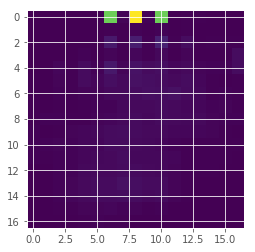

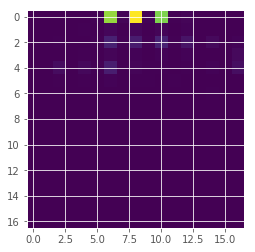

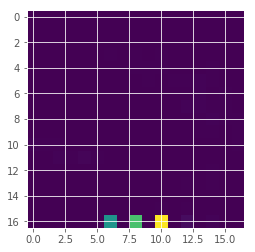

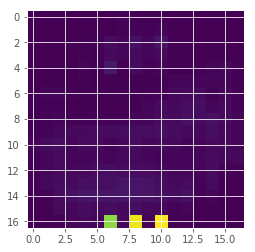

In [5]:
for index in range(4):
    plt.imshow(end_data[0,:,:,index])
    plt.show()

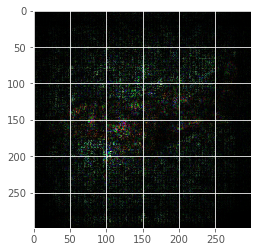

In [5]:
kkpt = end_data[0,:,:,:]
#print kkpt
kmin, kmax = kkpt.min(), kkpt.max()
kkk = (kkpt - kmin)/(kmax - kmin)
plt.imshow(kkk)

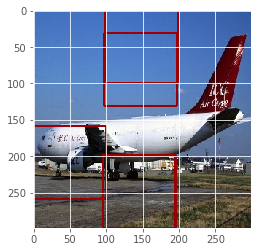

In [84]:
img_gray = cv.resize(end_data[0,:,:,0], (299,299))
#img_gray =  cv.cvtColor(kkk, cv.COLOR_BGR2GRAY)
r,h,c,w = 100,100,100,100
track_window = (c,r,w,h)
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 100000, 1 )
ret, track_window = cv.meanShift(img_gray, track_window, term_crit)
# Draw it on image
#pts = cv.boxPoints(ret)
#pts = np.int0(pts)
#img2 = cv.polylines(kkk,[pts],False, (255,255,255),10)
x,y,w,h = track_window
img2 = cv.rectangle(real_img, (x,y), (x+w,y+h), 100,2)
plt.imshow(img2)

plt.show()

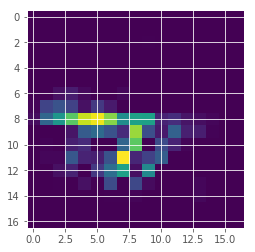

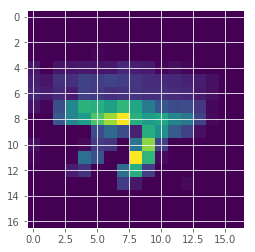

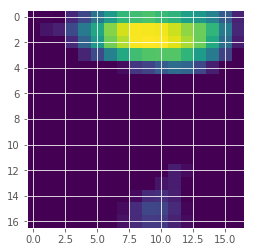

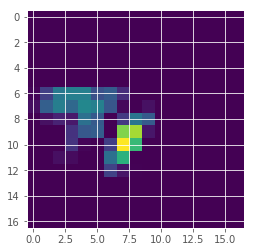

IndexError: index 4 is out of bounds for axis 3 with size 4

In [27]:
data_mean = np.mean(end_data[0,:,:,:], axis=2)
t = 0
for i in range(800):
    #if np.sum(end_data[0,:,:,i]) < (np.sum(data_mean) * 0.2):
    plt.imshow(end_data[0,:,:,i])
    plt.show()

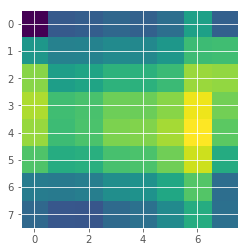

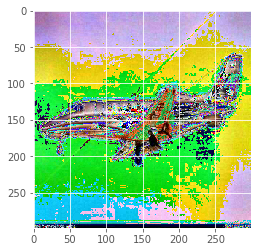

In [12]:
import numpy as np
features_mean = np.mean(end_data[0,:,:,:], axis=2)
features_mean = features_mean / (np.max(features_mean) - np.min(features_mean))
features_resize = cv2.resize(features_mean, (299, 299))
mark_image = np.zeros((299,299,3))
for i in range(3):
    mark_image[:,:,i] = show_image[0,:,:,i] * features_resize
plt.imshow(features_mean)
plt.show()
mark_image = mark_image
plt.imshow(mark_image)
plt.show()

In [14]:
imgs_file = "./report/Fokker/"
number = 0
images = np.zeros((325, 299, 299, 3))
for file_i in os.listdir(imgs_file):
    images[number, :, :, :] = cv2.imread(os.path.join(imgs_file, file_i))
    number = number + 1

end_data shape =$$ 8 * 8 * 1536 $$